In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# 2. Ecuaciones no lineales

En esta sección abordamos el problema de encontrar un *cero* de una función 
real $f$, es decir un $x^*$ tal que $f(x^*) = 0$.

## Graficación

Para graficar una función $f:\mathbb{R} \to \mathbb{R}$ en un intervalo $[a, b]$
tomamos una sucesión de $n + 1$ puntos uniformemente distanciados:
$$a = x_0, x_0 + h, x_0 + 2\,h + x_0 + 3\,h, \ldots, x_0 + n\,h = b$$

`linspace(a, b, n)` de numpy genera esta lista de $n$ puntos en el intervalo $[a, b]$ a una distancia $h = \frac{b - a}{n - 1}$:

In [3]:
x = np.linspace(1, 2, 11)
print(x)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


Los arreglos de numpy no son listas de Python usuales:
- Ocupan menos espacio en memoria
- Están orientados al álgebra lineal numérica, representando vectores, matrices, etc.
- Sus métodos están orientados a trabajar de forma paralela en cada elemento de manera
  tan extremadamente eficiente que no cualquier programador puede igualarle.

In [4]:
# Los vectores de numpy admiten operaciones elemento-a-elemento:
y = x**2 - 2  # Eleva cada entrada al cuadrado y le resta 2
print(y)

[-1.   -0.79 -0.56 -0.31 -0.04  0.25  0.56  0.89  1.24  1.61  2.  ]


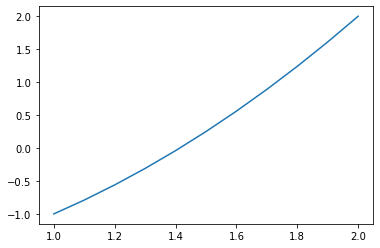

In [5]:
# Graficar las coordenadas x-y trazando líneas entre los puntos sucesivos:
plt.plot(x, y)

## Método de la bisección
Si $f$ es contínua en $[a, b]$ y $a$ y $b$ tienen tienen signos opuestos entonces $f$
cruza por $y = 0$ en algún $x \in (a, b)$.

**Definción** Un *corchete* $[a, b]$ para una función $f:\mathbb{R} \to \mathbb{R}$ es un intervalo tal que $f(a)\,f(b) < 0$.

**Ejemplo** $[1, 2]$ es un corchete de $f(x) = x^2 - 2$, puesto que $f(1) = -1$ y $f(2) = 2$.

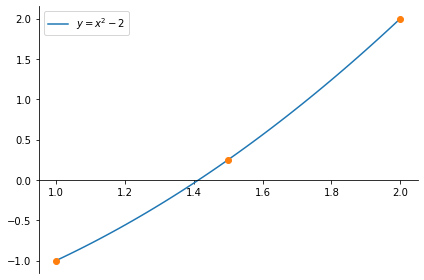

In [6]:
fig, ax = plt.subplots()
ax.spines[["bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
x = np.linspace(1, 2)
y = x**2 - 2
ax.plot(x, y, label="$y = x^2 - 2$")
x = np.array([1, 2, (1+2)/2])
y = x**2 - 2
ax.plot(x, y, 'o')
ax.legend()
fig.tight_layout()


Si $[a, b]$ es un corchete de $f$ entonces $m = (a + b)/2$ es una 
aproximación de dónde esperamos que se encuentre el cero de $f$.
En el improbable caso de que $m$ sea un cero de $f$ no hay nada más que hacer,
pero en caso contrario o bien $[a, m]$ es un corchete de $f$, o bien $[m, b]$
lo es.
En cualquier caso estos dos corchetes tienen la mitad de la longitud que el
original y podemos repetir el procedimiento hasta que el intervalo sea tan
pequeño como queramos.
Este es el *método de la bisección*.

In [7]:
def biseccion(f, a, b, ε):
    x = [a, b]
    while b - a > ε:
        m = (a + b) / 2
        x.append(m)
        if f(a) * f(m) < 0:
            b = m
        else:
            a = m
    return x


def f(x):
    return x ** 2 - 2


biseccion(f, 1, 2, 10 ** -4)


[1,
 2,
 1.5,
 1.25,
 1.375,
 1.4375,
 1.40625,
 1.421875,
 1.4140625,
 1.41796875,
 1.416015625,
 1.4150390625,
 1.41455078125,
 1.414306640625,
 1.4141845703125,
 1.41424560546875]

In [8]:
import math
def g(x):
    return math.cos(x) - x

biseccion(g, 0, 1, 10**-4)


[0,
 1,
 0.5,
 0.75,
 0.625,
 0.6875,
 0.71875,
 0.734375,
 0.7421875,
 0.73828125,
 0.740234375,
 0.7392578125,
 0.73876953125,
 0.739013671875,
 0.7391357421875,
 0.73907470703125]

Si el intervalo inicial tiene una longitud 1, el siguiente intervalo tendrá
longitud $1/2$, y el siguiente $1/4$ y así sucesivamente el $n$-ésimo
tendía longitud $1/2^n$.
Así, si queremos tener 4 dígitos de precisión deberemos realizar al menos 14
iteraciones, ya que:
$$\begin{align}
\frac{1}{2^n} &< 10^{-4}\\
2^n &\ge 10^{4}\\
n &\ge \log_2(10^{4})\\
&> 13.28\\
\end{align}$$


## Método de la posición falsa

En el método de la bisección usa $x_2 = \frac{x_0 + x_1}{2}$ como la estimación del
cero en el corchete $[x_0, x_1]$, sin embargo una mejor estimación consiste en
aproximar $f$ como la línea que pasa por $(x_0, y_0)$ y $(x_1, y_1)$.
La ecuación de dicha recta es
$$(y-y_0)\,(x_1-x_0)=(y_1-y_0)\,(x-x_0)\text{.}$$

Como queremos aproximar un 0 de $f$ que a su vez está aproximada por esta recta,
sustituimos $y=0$ y despejamos $x$ para obtener el punto donde la recta se
interseca con el eje $x$:
$$x = x_0-y_0\,\frac{x_1-x_0}{y_1-y_0}\text{.}$$

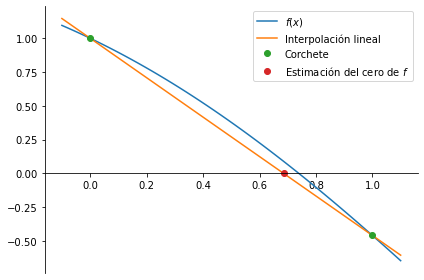

In [9]:
# Definir la función a la que vamos a encontrarle un cero
def f(x):
    return np.cos(x) - x


f = np.frompyfunc(f, nin=1, nout=1)  # Convertirla en función estilo numpy

# Establecer un corchete:
(a, b) = (0, 1)

# Inicializar un lienzo para graficar:
fig, ax = plt.subplots()
ax.spines[["bottom"]].set_position(("data", 0))  # Dibujar el eje x en y = 0.
ax.spines[["top", "right"]].set_visible(False)  # Quitar bordes sup. y der.

# Graficar f(x)
Δ = (b - a) * 0.1
x = np.linspace(a - Δ, b + Δ)
y = f(x)
ax.plot(x, y, label="$f(x)$")

# Graficar la interpolación lineal:
x0, x1 = a, b
y0, y1 = f([a, b])
y_linea = (y1 - y0)/(x1 - x0)*(x - x0) + y0
ax.plot(x, y_linea, label="Interpolación lineal")
x2 = x0 - y0 * (x1 - x0) / (y1 - y0)

# Graficar puntos de interés:
ax.plot([x0, x1], [y0, y1], "o", label="Corchete")
ax.plot([x2], [0], "o", label="Estimación del cero de $f$")

# Retocar la gráfica:
ax.legend()  # Colocar la leyenda
fig.tight_layout()  # Ajustar la figura


In [10]:
def posicion_falsa(f, a, b, ε):
    x = [a, b]
    while b - a > ε:
        y_a, y_b = f(a), f(b)
        m = a - y_a * (b - a) / (y_b - y_a)
        y_m = f(m)
        x.append(m)
        if y_a * y_m < 0:
            b = m
        else:
            a = m
    return x

In [11]:
def f(x):
    return x ** 2 - 2

posicion_falsa(f, 1, 2, 10 ** -4)

[1,
 2,
 1.3333333333333333,
 1.4,
 1.411764705882353,
 1.4137931034482758,
 1.4141414141414141,
 1.4142011834319528,
 1.41421143847487,
 1.4142131979695431,
 1.4142134998513232,
 1.4142135516460548,
 1.4142135605326258,
 1.4142135620573204,
 1.4142135623189167,
 1.4142135623637995,
 1.4142135623715002,
 1.4142135623728214,
 1.414213562373048,
 1.414213562373087,
 1.4142135623730936,
 1.414213562373095,
 1.4142135623730951]

Si nos olvidamos por un momento del requisito de tener un corchete, este mismo
método aún es viable para estimar el cero de una función:

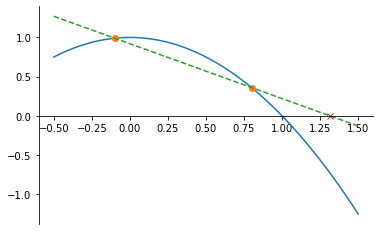

In [13]:
# Inicializar un lienzo para graficar:
fig, ax = plt.subplots()
ax.spines[["bottom"]].set_position(("data", 0))  # Dibujar el eje x en y = 0.
ax.spines[["top", "right"]].set_visible(False)  # Quitar bordes sup. y der.

x = np.linspace(-.5, 1.5, 50)
y = -x**2 + 1
plt.plot(x, y)

x0, x1 = -0.1, 0.8
y0 = -x0**2 + 1 
y1 = -x1**2 + 1
plt.plot([x0, x1], [y0, y1], 'o')
y = (y1 - y0)/(x1 - x0)*x + (y0 - ((y1 - y0)/(x1 - x0))*x0)
plt.plot(x, y, '--')
x2 = x0 - y0*(x1 - x0)/(y1 - y0)
plt.plot([x2], [0], 'x')

In [16]:
def secante(f, x_0, x_1, ε):
    x = [x_0, x_1]
    y = [f(x[0]), f(x[1])]
    while abs(x[-1] - x[-2]) > ε:
        x.append(x[-2] - y[-2] * (x[-1] - x[-2]) / (y[-1] - y[-2]))
        y.append(f(x[-1]))
    return x


secante(f, 1, 2, 10 ** -4)

[1,
 2,
 1.3333333333333333,
 1.4,
 1.4146341463414633,
 1.41421143847487,
 1.4142135620573204]

In [17]:
def f(x):
    return x**2 - 2

def df(x):
    return 2*x

def newton(f, df, x_0, ε):
    x = [x_0]ε
    while True:
        x.append(x[-1] - f(x[-1])/df(x[-1]))
        if abs(x[-1] - x[-2]) <= ε:
            break
    return x

newton(f, df, 1, 10**-4)

[1, 1.5, 1.4166666666666667, 1.4142156862745099, 1.4142135623746899]

## Teorema del punto fijo

Llamamos *iteración de punto fijo* de una función $g$ a
$$x_{k +1} = g(x_k)\text{.}$$
Un *punto fijo* de $g$ es un $x^*$ tal que
$$x^* = g(x^*)\text{.}$$

La *transformada de Newton* es una función a la que se le busca un punto fijo:
$$N_f(x) = x - \frac{f(x)}{f^\prime(x)}$$

**Teorema** *(del punto fijo)*:
Sea $g:[a, b] \to [a, b]$, entonces $g$ tiene un punto fijo en $[a, b]$, si
además $g$ es diferenciable en $(a, b)$ y existe un $\lambda \in (0, 1)$ tal
que $|g^\prime(x)|\le \lambda$ en $(a, b)$, entonces este punto fijo es único
y la iteración $x_{k +1} = g(x_k)$ converge para cualquier $x_0 \in [a, b]$.

*Demostración*
Sup. $g$ es contínua en $[a, b]$ y que $g:[a, b] \to [a, b]$.

Primero demostraremos que $g$ tiene un punto fijo en $[a, b]$.
Si $g(a)= a$ o $g(b) = b$ entonces no hay nada que probar, puesto que $a$ o $b$
son un punto fijo de $g$.
De lo contrario, definamos $h(x) = g(x) - x$; entonces $h(x)$ es continua y $h$
tiene un cero en $[a, b]$ si y sólo si $g$ tiene un punto fijo en $[a, b]$.
$$h(a) = g(a) - a > 0\text{;}$$
de manera similar
$$h(b) = g(b) - b < 0\text{.}$$
Por el Teorema del Valor Intermedio tenemos que existe un $c\in (a, b)$ tal que
$h(c) = 0$, esto es, tal que $g(c) = c$.

A continuación demostraremos la unicidad del punto fijo cuando $g$ es
diferenciable en $(a, b)$ y $|g^\prime(x)|\le \lambda$ en $(a, b)$ para algún
$\lambda \in (0, 1)$.
Supongamos que $p$ y $q$ son dos puntos fijos de $g$ entonces por el teorema
del valor intermedio existe $\theta \in [p, q]$ tal que
$$\frac{g(p) - g(q)}{p - q}=g^\prime(\theta)$$
Como $p$ y $q$ son puntos fijos, entonces esto significa que
$$\frac{p - q}{p - q}=g^\prime(\theta) = 1$$
pero esto contradice que $|g^\prime(\theta)| \le \lambda < 1$.

Falta demostrar que podemos encontrar el punto fijo mediante la iteración.
Sea $x_0\in [a, b]$.
$$\begin{align*}
|x_n - x^*| &= |g(x_{n - 1}) - g(x^*)|\\
        &= |g^\prime(\theta)|\,|x_{n - 1} - x^*|\\
        &\le \lambda\,|x_{n - 1} - x^*|
\end{align*}$$
Por lo tanto
$$\lim_{n\to\infty}x_n = x^*\text{.}$$
<div style="text-align: right">□</div>

*Ejemplo 1.* En la antigüedad se calculaba la raíz cuadrada de un número $A$
comenzando con un rectángulo de área $A$ y aproximándolo cada vez más a un
cuadrado haciendo un nuevo rectángulo cuya base sea el promedio de la base y
la altura del rectángulo anterior.
Esto es una iteración de punto fijo
$$x_{k + 1} = \frac{1}{2}\left(x_k + \frac{A}{x_k}\right)$$

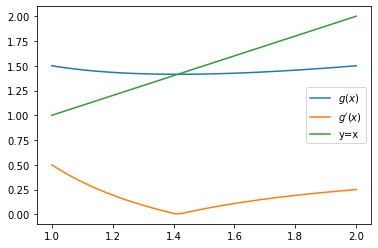

In [30]:
fig, ax = plt.subplots()

A = 2
x = np.linspace(1, 2)
y = (1/2)*(x + A/x)
yp = np.abs((1/2) - (1/2)*A/x**2)
ax.plot(x, y, label="$g(x)$")
ax.plot(x, yp, label="$g^\prime(x)$")
ax.plot(x, x, label="y=x")
ax.legend()

In [14]:
def aprox_raiz(A, x):
    return (1/2)*(x + A/x)

In [20]:
x = 1.0
for k in range(5):
    x = aprox_raiz(2, x)
    print(x)



1.5
1.4166666666666665
1.4142156862745097
1.4142135623746899
1.414213562373095


*Ejemplo 2.* Encontrar los ceros de $f(x) = \mathrm{e}^x + x^2 - 5\,x$.

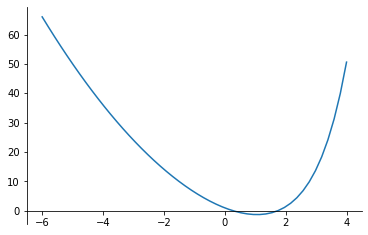

In [40]:
# Inicializar un lienzo para graficar:
fig, ax = plt.subplots()
ax.spines[["bottom"]].set_position(("data", 0))  # Dibujar el eje x en y = 0.
ax.spines[["top", "right"]].set_visible(False)  # Quitar bordes sup. y der.

x = np.linspace(-6, 4)
y = np.exp(x) + x**2 - 5*x
ax.plot(x, y)

Como queremos encontrar la solución mediante una iteración de punto fijo:
$$\begin{align*}
\mathrm{e}^x + x^2 - 5\,x &= 0 \\
5\,x &= \mathrm{e}^x + x^2 \\
x &= \frac{1}{5}(\mathrm{e}^x + x^2) \\
\end{align*}$$

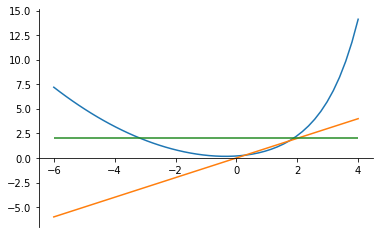

In [75]:
fig, ax = plt.subplots()
ax.spines[["bottom"]].set_position(("data", 0))  # Dibujar el eje x en y = 0.
ax.spines[["top", "right"]].set_visible(False)  # Quitar bordes sup. y der.

x = np.linspace(-6, 4)
y = (1/5)*(np.exp(x) + x**2)
ax.plot(x, y)
ax.plot(x, x)
ax.hlines([2], x[0], x[-1], color="forestgreen")

In [77]:
x = [1/3]
for k in range(10):
    x.append((1/5)*(math.exp(x[-1]) + x[-1]**2))
x

[0.3333333333333333,
 0.3013447072394402,
 0.28849676520958406,
 0.28353008329663565,
 0.28163962654279484,
 0.2809243819687206,
 0.28065439270645787,
 0.2805525660690764,
 0.2805141746673991,
 0.2804997018579091,
 0.28049424614537144]

In [82]:
x = [7/4]
for k in range(9):
    x.append((1/5)*(math.exp(x[-1]) + x[-1]**2))
x

[1.75,
 1.7634205352011465,
 1.7884010133645019,
 1.8356522498500447,
 1.927768218719901,
 2.1180883623490216,
 2.5603049790190746,
 3.898984931132871,
 12.910882230669484,
 80971.7922210183]

Respecto a este mismo ejemplo, pero con la transformada de Newton:

In [65]:
import sympy
x = sympy.symbols("x")
f = sympy.exp(x) + x**2 - 5*x
df = sympy.diff(f, x)
df

2*x + exp(x) - 5

Por lo tanto, la transformada de Newton de $f$ es
$$N_f(x) = x - \frac{\mathrm{e}^x + x^2 - 5\,x}{\mathrm{e}^{x} + 2 x - 5}$$

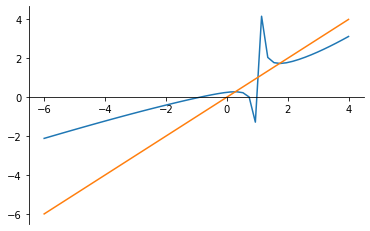

In [48]:
# Inicializar un lienzo para graficar:
fig, ax = plt.subplots()
ax.spines[["bottom"]].set_position(("data", 0))  # Dibujar el eje x en y = 0.
ax.spines[["top", "right"]].set_visible(False)  # Quitar bordes sup. y der.

x = np.linspace(-6, 4)
y = x - (np.exp(x) + x**2 - 5*x)/(np.exp(x) + 2*x - 5)
ax.plot(x, y)
ax.plot(x, x)


In [68]:
x = [7/4]
for k in range(10):
    x.append(
        x[-1]
        - (math.exp(x[-1]) + x[-1] ** 2 - 5 * x[-1])
        / (math.exp(x[-1]) + 2*x[-1] - 5)
    )
x


[1.75,
 1.7342282156253592,
 1.7339957633941065,
 1.7339957132730537,
 1.7339957132730515,
 1.7339957132730515,
 1.7339957132730515,
 1.7339957132730515,
 1.7339957132730515,
 1.7339957132730515,
 1.7339957132730515]

**Definición**. Decimos que $x^*$ es un *cero simple* de $f$ si $x^*$ es un cero de $f$ pero
no es un cero de $f^\prime$.

**Teorema** (de la convergencia del método de Newton).
Supongamos que $f(x)$ tiene un cero simple $x^\star$ en $[a, b]$ y que $f$ es
dos veces diferenciable en $[a, b]$; entonces existe un intervalo en la
vecindad de $x^*$ tal que el método de Newton converge a $x^*$ en el intervalo.